# Aplicação do Algoritmo K-Means para Agrupar Poemas em português - Lab 3

Objetivo: Usar o Algoritmo K-Means para agrupar poemas.

O K-means é um algoritmo de aprendizado não supervisionado utilizado para agrupar dados em conjuntos, com base em características similares. O objetivo principal do K-means é dividir um conjunto de dados em "k" grupos, para identificar o melhor valor de “k” vou usar o Método do Cotovelo. Cada grupo é representado por um centroide, que é a média dos pontos pertencentes a esse grupo.  


In [ ]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn           as sns

import nltk
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import altair as alt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Lendo dados:

In [ ]:
df= pd.read_csv('https://gist.githubusercontent.com/issilva5/b4a1c6dc5989ad83663ae02929f2894c/raw/17d27552de56f3b38c5c2823b26e8bd77318cbc0/poemas.csv')
df.head(5)

,Author,Content
0,Cecília Meireles,"Retrato\nEu não tinha este rosto de hoje,\nAss..."
1,Fernando Pessoa,"Para ser grande, sê inteiro: nada\nPara ser gr..."
2,Marina Colasanti,"Eu sei, mas não devia\nEu sei que a gente se a..."
3,Carlos Drummond de Andrade,Quadrilha\nJoão amava Teresa que amava Raimund...
4,Eugénio de Andrade,É urgente o amor\nÉ urgente o amor.\nÉ urgente...


In [ ]:
df.shape

(8983, 2)

## Passo 1: Pré-processamento dos Dados Textuais

In [ ]:
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

def getAuthorList(data):
     authors = df['Author'].to_list()
     authors = [author.lower().split(' ') for author in authors]
     authors = sum(authors, [])
     authors = list(set(authors))
     return authors


def preprocess(docs):
  clean_poems = []
  authorsList = getAuthorList(docs)
  stop_words = set(stopwords.words("portuguese"))
  ss = SnowballStemmer("portuguese")
  other_word = ['paulo', 'publicado', 'editorial', 'pág', 'vol','págs', 'obra']

  for idx in range(len(docs)):
    poem = docs['Content'][idx]

    # Remover caracteres especiais e dígitos
    poem = re.sub("(\\d|\\W)+|\w*\d\w*"," ", poem)
    poem = re.sub(r'http\S+', '', poem)
    poem = re.sub(r'www\S+', '', poem)
    poem = poem.lower()

    # Tokenizar
    poem = word_tokenize(poem)
    # Remover stopwords e nomes de autores
    poem = removeWords(poem, stop_words)
    poem = removeWords(poem, authorsList)
    poem = removeWords(poem, other_word)
    # Aplicar stemming
    poem = [ss.stem(word) for word in poem]
    poem = removeWords(poem, stop_words)
    # Remover palavras pequenas, depois juntar
    poem = ' '.join(s for s in poem if len(s) > 2)
    clean_poems.append(poem)

  return clean_poems

In [ ]:
poems = preprocess(df)

In [ ]:
poems[:3]

['retrat rost hoj assim calm assim trist assim magr olhos vazi lábi amarg forc par fri mort coraçã mostr dei mudanc simpl cert fácil espelh fic perd fac',
 'grand inteir nad grand inteir nad exag exclu tod cad cois quant mínim faz assim cad lag lua tod brilh porqu alta viv',
 'sei dev sei gent acostum dev gent acostum mor apart fund ter outr vist janel redor porqu vist log acostum olhar porqu olha log acostum abrir tod cortin porqu abre cortin log acostum acend ced luz med acostum esquec sol esquec esquec amplidã gent acostum acord manhã sobressalt porqu hor tom caf corr porqu atras ler jornal ônibus porqu pod perd temp viag sanduích porqu pra almoc sair trabalh porqu noit cochil ônibus porqu cans deit ced dorm pes ter viv dia gent acostum abrir jornal ler sobr aceit aceit mort númer mort aceit númer aceit acredit negoc aceit ler tod dia númer long duraçã gent acostum esper dia inteir ouv telefon hoj poss sorr pesso receb sorris volt ignor precis tant vist gent acostum pag tud desej ne

Aplicando TF-IDF:

In [ ]:
def buildTFIDFVectorizer(docs):
  vect = TfidfVectorizer(
          min_df = 5,
          max_df = 0.8,
          max_features = None,
        )
  matrix = vect.fit_transform(docs)
  return matrix, vect

In [ ]:
matrix, vect = buildTFIDFVectorizer(poems)
words = vect.get_feature_names_out()
words[:10]

array(['abad', 'abaf', 'abaix', 'abajur', 'abal', 'aban', 'abandon',
       'abarc', 'abarrot', 'abat'], dtype=object)

In [ ]:
len(words)

8737

In [ ]:
final_df = pd.DataFrame(data = matrix.toarray(), columns=vect.get_feature_names_out())

## Passo 2: Execução do Algoritmo K-Means com Diferentes Valores de K

In [ ]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = KMeans(n_clusters = k
                        , init = 'k-means++'
                        , n_init = 1
                        , tol = 0.0001
                        , random_state = 1
                        , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )

    return kmeans_results

In [ ]:
k = 9
kmeans_results = run_KMeans(k, final_df)
kmeans_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

{2: KMeans(algorithm='full', n_clusters=2, n_init=1, random_state=1),
 3: KMeans(algorithm='full', n_clusters=3, n_init=1, random_state=1),
 4: KMeans(algorithm='full', n_clusters=4, n_init=1, random_state=1),
 5: KMeans(algorithm='full', n_clusters=5, n_init=1, random_state=1),
 6: KMeans(algorithm='full', n_clusters=6, n_init=1, random_state=1),
 7: KMeans(algorithm='full', n_clusters=7, n_init=1, random_state=1),
 8: KMeans(algorithm='full', n_init=1, random_state=1),
 9: KMeans(algorithm='full', n_clusters=9, n_init=1, random_state=1)}

## Passo 3: Identificação do Melhor Valor de K



Calculando o Método do Cotovelo usando a soma do quadrado das distâncias das amostras a seus respectivos centros:

O **Método do Cotovelo** é um método gráfico que envolve a execução do K-means para diferentes valores de k e plotar a variação da inércia (soma das distâncias ao quadrado entre cada ponto de dados e o centroide do seu cluster) em relação a k. O ponto em que a curva começa a se achatar, formando um "cotovelo", é escolhido como o melhor valor de k.

In [ ]:
inertia_values = []
n = range(2,k)
for i in n:
  inertia_values.append(kmeans_results[i].inertia_)

# Escolhendo o ponto em que a curva começa a nivelar
best_point = 2
smallest_distance = float('inf')

for i in range(1, len(inertia_values)):
    distance = inertia_values[i-1] - inertia_values[i]

    if distance < smallest_distance and inertia_values[i-1] > inertia_values[i]:
        smallest_distance = distance
        best_point = i-1 + 2

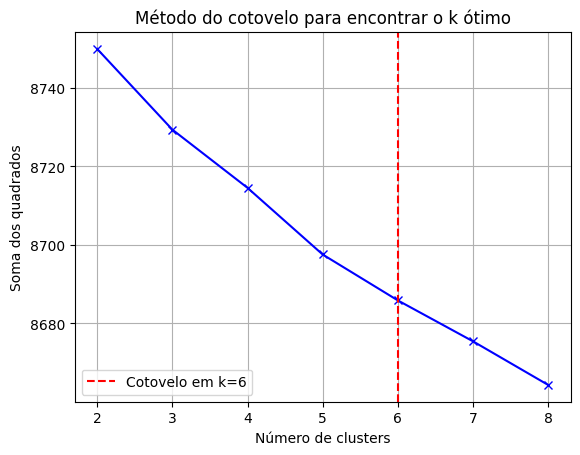

In [ ]:
plt.plot(n, inertia_values, 'bx-')
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos quadrados")
plt.title('Método do cotovelo para encontrar o k ótimo')

# Adicione uma linha vertical para indicar o ponto do cotovelo
plt.axvline(x=best_point, color='r', linestyle='--', label=f'Cotovelo em k={best_point}')

plt.legend()
plt.grid()
plt.show()

Analisando cada ponto em busca do ponto de menor discrepância no eixo y, indicativo de uma nivelamento na curva, obtive como resultado k = 6.

## Passo 4: Análise dos Clusters

In [ ]:
best_result = best_point
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)

In [ ]:
df_poem = poemas = df.assign(grupo = prediction)
df_poem.head(10)

,Author,Content,grupo
0,Cecília Meireles,"Retrato\nEu não tinha este rosto de hoje,\nAss...",3
1,Fernando Pessoa,"Para ser grande, sê inteiro: nada\nPara ser gr...",1
2,Marina Colasanti,"Eu sei, mas não devia\nEu sei que a gente se a...",1
3,Carlos Drummond de Andrade,Quadrilha\nJoão amava Teresa que amava Raimund...,3
4,Eugénio de Andrade,É urgente o amor\nÉ urgente o amor.\nÉ urgente...,3
5,Vinicius de Moraes,"Procura-se um amigo\nNão precisa ser homem, ba...",1
6,Fernando Pessoa,"X. MAR PORTUGUÊS\nÓ mar salgado, quanto do teu...",0
7,Vinicius de Moraes,Eu sei e você sabe\nEu sei e você sabe\nJá que...,5
8,Gonçalves Dias,"Como eu te amo\nComo se ama o silêncio, a luz,...",4
9,Manuel Bandeira,Poema tirado de uma notícia de jornal\nJoão Go...,2


In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vect.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Palavras mais comuns Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

### Análise das distribuição de palavras

Para observar as palavras mais frequentes em cada cluster vou usar um histograma

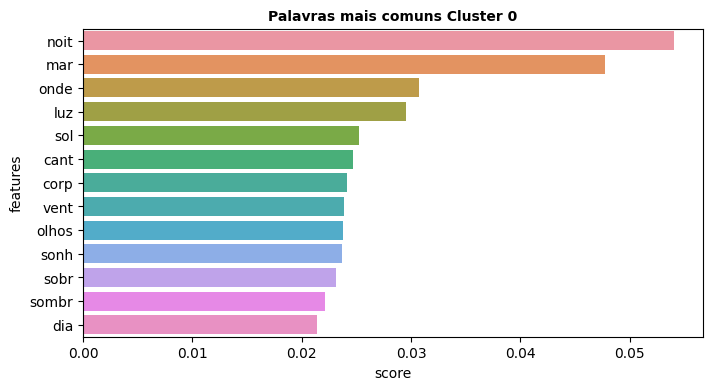

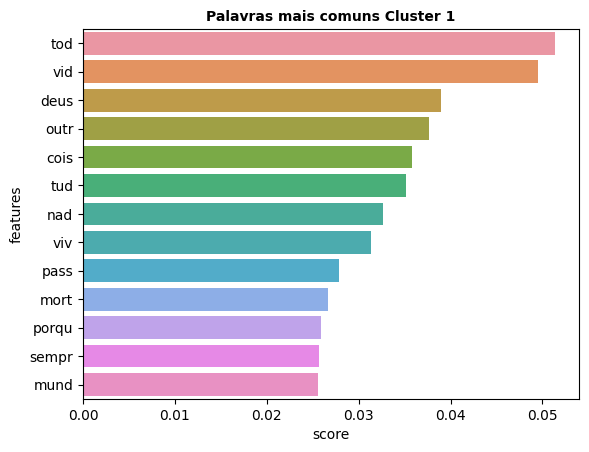

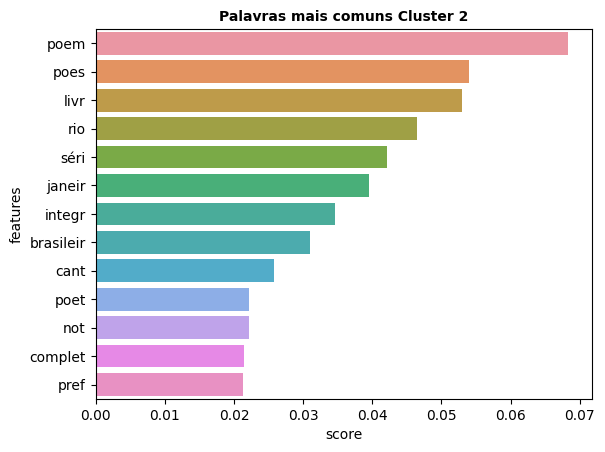

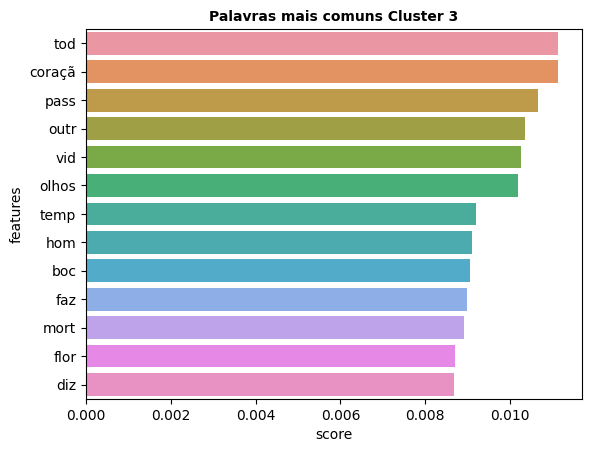

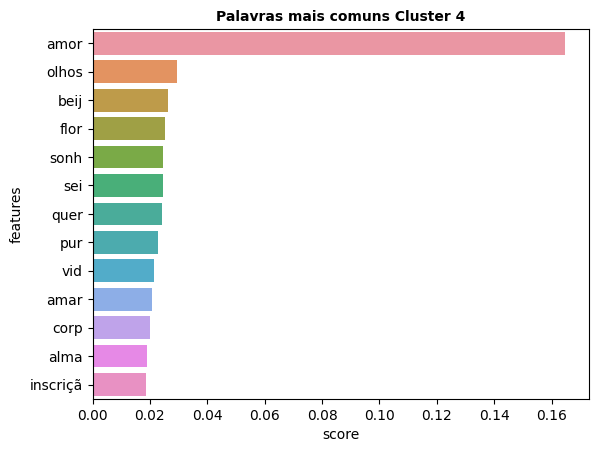

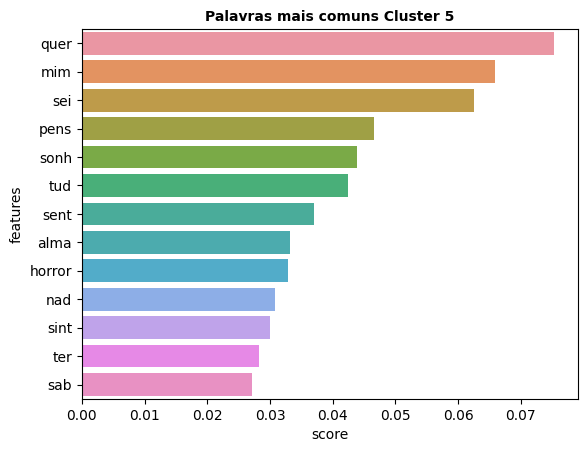

In [ ]:
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

### Classificando clusters

In [ ]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-15:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : noit, mar, onde, luz, sol, cant, corp, vent, olhos, sonh, sobr, sombr, dia, voz
1 : tod, vid, deus, outr, cois, tud, nad, viv, pass, mort, porqu, sempr, mund, temp
2 : poem, poes, livr, rio, séri, janeir, integr, brasileir, cant, poet, not, complet, pref, tod
3 : tod, coraçã, pass, outr, vid, olhos, temp, hom, boc, faz, mort, flor, diz, tud
4 : amor, olhos, beij, flor, sonh, sei, quer, pur, vid, amar, corp, alma, inscriçã, jan
5 : quer, mim, sei, pens, sonh, tud, sent, alma, horror, nad, sint, ter, sab, diz




*   Grupo 0: Natureza - Tem as palavras noite, luz, sol, sombra, mar, vento

*  Grupo 1: Existência e Espiritualidade - Tem as palavras deus, vida, morte, tudo e nada

* Grupo 2: Poema e arte - Tem as palavras poema, poesia, poeta

* Grupo 3: Corpo - Tem as palavras coração, olhos, boca, homem

* Grupo 4: Amor e Intimidade - Tem as palavras amor, beijo, puro, amar

* Grupo 5: Pensamentos - Tem as palavras penso, sonho, alma, sinto, horror



### Distribuição dos clusters

In [ ]:
df_poem['grupo'].value_counts()

3    3424
0    1646
1    1468
5     887
2     850
4     708
Name: grupo, dtype: int64

Não são distribuidos igualmente, o grupo 03, que tem mais poemas, tem quase 5 vezes a quantidade do grupo 04 com menos poemas.

### Análise dos autores

Mostrando o top 10 dos autores com mais frequencia em cada grupo.

In [ ]:
for g in range(0, best_point):
  print('\n-----\nGRUPO {}:'.format(g))
  print(df_poem.query('grupo ==  {}'.format(g))['Author'].value_counts()[0:10])
  print('-----')


-----
GRUPO 0:
Fernando Pessoa       168
Castro Alves          118
Florbela Espanca      100
Angela Santos          98
Nuno Júdice            57
Al Berto               45
Ruy Belo               35
Mafalda Veiga          27
Cecília Meireles       26
Eugénio de Andrade     24
Name: Author, dtype: int64
-----

-----
GRUPO 1:
Fernando Pessoa               447
Ruy Belo                       78
Manuel António Pina            54
Angela Santos                  34
Florbela Espanca               31
Nuno Júdice                    26
Renato Russo                   25
Carlos Drummond de Andrade     25
Luís de Camões                 22
Reinaldo Ferreira              21
Name: Author, dtype: int64
-----

-----
GRUPO 2:
João Cabral de Melo Neto    25
Alphonsus de Guimaraens     21
Cruz e Sousa                19
Murilo Mendes               18
Castro Alves                18
Henriqueta Lisboa           17
Raimundo Correia            17
Cacaso                      16
Joaquim Cardozo             15
Olavo B

Esse são os autores que aparecem em apenas um grupo: 

Mostra o nome do autor e em qual grupo ele pertence exclusivamente.

In [ ]:
authorsList = df['Author'].to_list()

author = set()
for a in authorsList:
  author_count = df_poem.query('Author == "{}"'.format(a))[['grupo', 'Author']].groupby('grupo').count()

  if author_count.shape[0] == 1:
    author.add((a, author_count.index.to_list()[0]))

print(author)

{('António Lobo de Carvalho', 3), ('Oscar Wilde', 3), ('Alphonsus de Guimaraens', 2), ('Leopoldo María Panero', 3)}
